<a href="https://colab.research.google.com/github/farshadabdulazeez/deep-learning-basics/blob/main/cat_vs_dog_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import zipfile

**Create the .kaggle directory and move the kaggle.json file for Kaggle API setup**


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

**Download the "Dogs vs Cats" dataset from Kaggle**

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:06<00:00, 119MB/s]
100% 1.06G/1.06G [00:06<00:00, 185MB/s]


**Extract the dataset from the downloaded zip file**

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

 **Load the dataset into TensorFlow using image_dataset_from_directory**


In [6]:
# Training dataset generator

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',  # Path to the training dataset
    labels='inferred',           # Infer labels from folder names
    label_mode='int',            # Labels are integer-encoded
    batch_size=32,               # Number of samples per batch
    image_size=(256, 256)        # Resize images to 256x256
)

# Validation dataset generator

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',   # Path to the validation dataset
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


**Normalize the image data to scale pixel values between 0 and 1**

In [7]:
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)  # Normalize image pixel values
    return image, label

# Apply the normalization process to both training and validation datasets
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

**Define the Convolutional Neural Network (CNN) model**

In [8]:
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten the feature map to feed into dense layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer (sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Display the model architecture**

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

**Compile the model**

In [10]:
model.compile(
    optimizer='adam',              # Adam optimizer for adaptive learning rate
    loss='binary_crossentropy',    # Binary cross-entropy for two-class classification
    metrics=['accuracy']           # Track accuracy during training
)

**Train the model and validate it during training**

In [11]:
history = model.fit(
    train_ds,                      # Training dataset
    epochs=10,                     # Number of epochs for training
    validation_data=validation_ds  # Validation dataset
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 78ms/step - accuracy: 0.6001 - loss: 0.6721 - val_accuracy: 0.7154 - val_loss: 0.5570
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.7572 - loss: 0.4950 - val_accuracy: 0.7850 - val_loss: 0.4548
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8200 - loss: 0.3895 - val_accuracy: 0.7916 - val_loss: 0.4693
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8791 - loss: 0.2804 - val_accuracy: 0.7970 - val_loss: 0.5351
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.9437 - loss: 0.1461 - val_accuracy: 0.7720 - val_loss: 0.7273
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.9666 - loss: 0.0923 - val_accuracy: 0.7846 - val_loss: 0.8549
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 94ms/step - accuracy: 0.9778 - loss: 0.0626 - val_accuracy: 0.7860 - val_loss: 0.8893
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 89ms/step - accuracy: 0.9826 - loss: 0.0484 - 

In [14]:
import cv2

**Load and preprocess an image, and predict its class**


In [15]:
# Test with a dog image

test_img_dog = cv2.imread('/content/dog.jpg')

**Display the dog image**

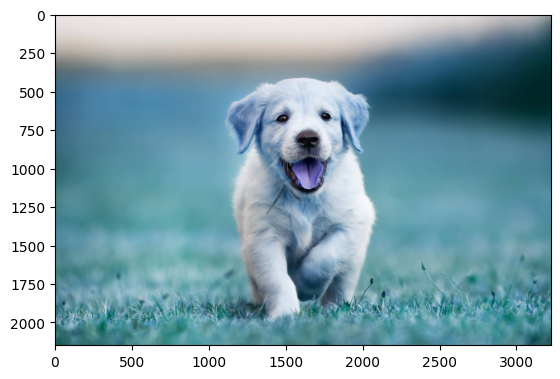

In [16]:
plt.imshow(test_img_dog)

**Check the shape of the dog image**

In [17]:
test_img_dog.shape

(2149, 3224, 3)

**Resize the image to match model input dimensions**

In [18]:
test_img_dog = cv2.resize(test_img_dog, (256,256))

**Reshape the image to include the batch dimension**

In [19]:
test_input = test_img_dog.reshape((1,256,256,3))

**Display prediction result for dog image**

In [20]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step


array([[1.]], dtype=float32)

## ***If the output is 1, it is a Dog. If the output is 0, it is a Cat.***

**Test with a cat image**

In [21]:
test_img_cat = cv2.imread('/content/cat.jpg')

**Display the cat image**

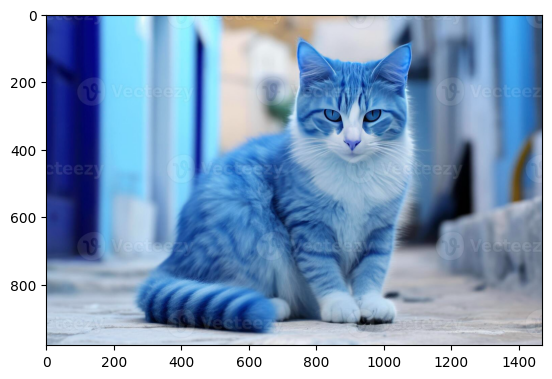

In [22]:
plt.imshow(test_img_cat)

**Check the shape of the cat image**

In [23]:
test_img_cat.shape

(980, 1470, 3)

**Resize the image to match model input dimensions**

In [24]:
test_img_cat = cv2.resize(test_img_cat, (256,256))

Reshape the image to include the batch dimension

In [25]:
test_input = test_img_cat.reshape((1,256,256,3))

**Display prediction result for cat image**

In [26]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.]], dtype=float32)